### Importing required libraries

In [20]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
import sklearn

import time

### Reading the input file

In [21]:

df = pd.read_csv('data/output/output.csv')
print(len(df))

48740


### Checking count of each opening

In [22]:
print(df['Opening'].value_counts())

sicilian_rossolimo        25710
four_knights              10066
caro_kann_classic          9616
sicilian_dragon_other6     1752
qid4e3                     1596
Name: Opening, dtype: int64


### Replacing Opening and game result with numerical values

In [23]:
df.replace({'Opening': {'sicilian_rossolimo':1, 'caro_kann_classic':2, 'sicilian_dragon_other6':3, 'four_knights':4, 'qid4e3':5}}, inplace=True)
df.replace({'game_result': {'draw':0, 'white':1, 'black':2}}, inplace=True)

### Decision Tree for Based on Opening, WhiteElo and BlackElo

#### Splitting the data into train and test

In [24]:
def prep_training(df, first_n_moves):
    
    x = df[['WhiteElo', 'BlackElo', 'Opening']]
    y = df.iloc[:, 10]
    print("__________________________________________")
    print("Shape of x: ", x.shape)
    print("Shape of y: ", y.shape)
   
    return sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [25]:
x_train, x_test, y_train, y_test = prep_training(df, 4)
print("*********")
print(x_train, x_test, y_train, y_test)

__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
*********
       WhiteElo  BlackElo  Opening
2041     2155.0    2315.0        4
41743    2313.0    2212.0        1
35287    2219.0    2118.0        1
7535     2463.0    2560.0        4
45167    2595.0    2522.0        1
...         ...       ...      ...
42793    2450.0    2604.0        1
25163    2240.0    2425.0        1
43462    2254.0    2128.0        1
35294    2328.0    2206.0        1
14725    2356.0    2390.0        2

[38992 rows x 3 columns]        WhiteElo  BlackElo  Opening
13893    2400.0    2477.0        2
16317    2269.0    2430.0        2
46935    2428.0    2704.0        1
41893    2523.0    2604.0        1
17786    2341.0    2480.0        2
...         ...       ...      ...
25142    2355.0    2550.0        1
22961    2555.0    2315.0        1
6970     2406.0    2387.0        4
4630     2422.0    2264.0        4
8666     2502.0    2311.0        4

[9748 rows x 3 columns] 2041     1

#### Building decision tree
##### Finding accuracy 

In [26]:
def build_decision_tree():
    

    #  1. create a model
    clf = DecisionTreeClassifier(max_depth =12) #max_depth = depth

    #  2. feed training data into the model
    clf = clf.fit(x_train,y_train)

    #  3. predict values for your test data
    y_pred = clf.predict(x_test)
    
    #class_n = ['result']
    plt.figure(figsize=(12,12))  # set plot size
    class_n = ['draw', 'white', 'black']
    tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n);
    plt.show()

    #  5. find the training and testing accuracy
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

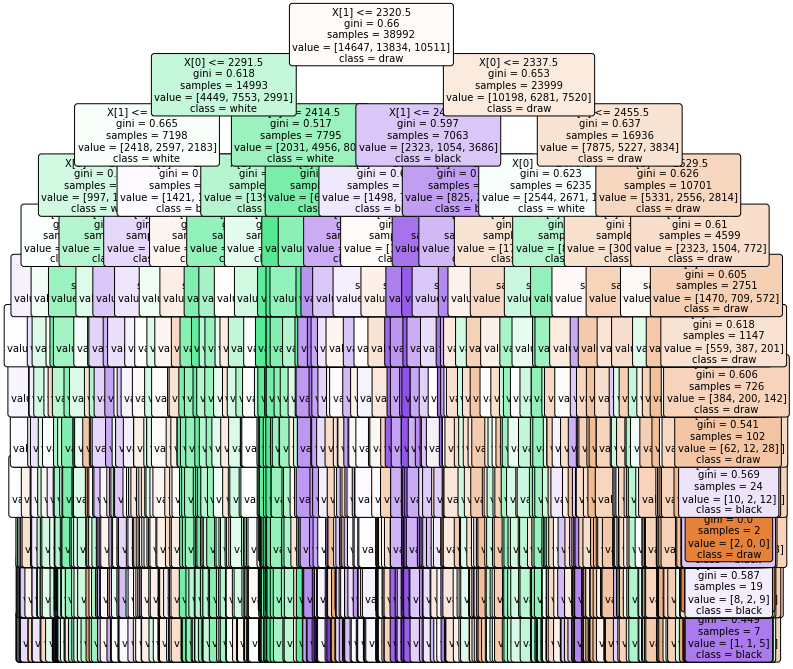

Accuracy: 0.49363972096840375

Time:
96.00454521179199


In [27]:
start = time.time()
build_decision_tree()
end = time.time()
print('\nTime:')
print(end - start)

### Decision Tree for First "X" moves, Opening, WhiteElo, BlackElo
#### Here data is split with same type of first "X" moves and then Decision Tree is applied 

In [28]:
npData = df.to_numpy()

firstXDict = {}

for sampleIndex in range(len(npData)):
    moves = npData[sampleIndex][7] # index of  moves
    movesList = moves.split()
    
    #firstTwo = " ".join(movesList[0:4]) # Moves 0, 1 
    firstX = " ".join(movesList[0:20]) 
        
    if firstX in firstXDict.keys():
        firstXDict[firstX].append(sampleIndex)
    else:
        firstXDict[firstX] = [sampleIndex]


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt


for key in firstXDict.keys():
    
    if len(firstXDict[key]) >= 2:

        trainingIndices = firstXDict[key][0:(int)(len(firstXDict[key]) * 0.8)]
        testingIndices = firstXDict[key][len(trainingIndices):len(firstXDict[key])]
        
        print("Key: ", key)
        print("Key length: ",len(firstXDict[key]))
        
            
        x = df[['WhiteElo', 'BlackElo', 'Opening']]
        y = df.iloc[:, 10]
        print("__________________________________________")
        print("Shape of x: ", x.shape)
        print("Shape of y: ", y.shape)
   
        x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
        clf = DecisionTreeClassifier(max_depth=12)
        clf.fit(x_train, y_train)

        y_pred = clf.predict(x_test)

        
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
        
#         plt.figure(figsize=(12,12))  # set plot size
#         class_n = ['draw', 'white', 'black']
#         feature_cols = ['white_elo', 'black_elo', 'opening']
#         tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n, feature_names = feature_cols);
#         plt.show()



Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 Qe7+ Qe2 Qxe2+ Kxe2 Nxd5
Key length:  29
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49825605252359456
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Nxd4 exd4 e5 dxc3 exf6 Qxf6 dxc3 Qe5+ Qe2 Qxe2+ Bxe2 d5
Key length:  53
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4968198604842019
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 Bb4 Nxe5 Qe7 Qd3 Nxe5 dxe5 Qxe5 Bd2 O-O O-O-O d6 f3 Bd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5056421830118999
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 Bb4 Nxe5 Qe7 Nxc6 Qxe4+ Qe2 dxc6 Bd2 Qxe2+ Bxe2 Bf5 O-O-O O-O-O
Key length:  10
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4954862535904801
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 d6 d4 exd4 Qxd4 Bd7 Bxc6 Bxc6 Bg5 Be7 O-O-O O-O e5 dxe5
Key le

Accuracy:  0.49743537135822735
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 Qe7+ Qe2 cxd5 Qxe7+ Kxe7
Key length:  25
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5108740254411162
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 O-O O-O d5 exd5 cxd5 Bg5 c6
Key length:  260
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4977431267952401
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nd5 Be7 Nxd4 Nxd5 exd5 Nxd4 Qxd4 O-O Be3 Bf6 Qb4 a5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5005129257283545
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Nxd4 exd4 e5 dxc3 exf6 Qxf6 dxc3 Qe5+ Qe2 Qxe2+ Bxe2 d6
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5054370127205581
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 h3 h6 Ne2 Ne7 c3 Ba5 

Accuracy:  0.5034878949528109
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Nxd4 exd4 e5 dxc3 exf6 Qxf6 dxc3 Bc5 O-O O-O Bd3 d6
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4986663931062782
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Bxc3 bxc3 Qe7 d4 h6 Bh4 Bg4
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5077964710709889
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 cxd5 Qe2+ Qe7 Qxe7+ Kxe7
Key length:  27
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49630693475584736
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 cxd5 Qe2+ Be7 Bg5 O-O
Key length:  24
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4952810832991383
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Ne2 Bg4 c3 Bc5 Ng3 Nh5 Nf5 Bb6

Accuracy:  0.4926138695116947
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 O-O O-O Re8 Bg5 h6 Bh4 Rb8
Key length:  24
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49887156339762
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 Bc5 Nxe5 O-O Nd3 Bb6 e5 Ne8 Nd5 d6 Ne3 dxe5
Key length:  23
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5080016413623307
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 O-O O-O Nxe5 Nxe5 d4 Bd6 f4 Nc6 e5 Be7 exf6 Bxf6
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5048215018465326
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Bxc3 bxc3 h6 Bh4 Bd7 Rb1 a6
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5073861304883053
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 O-O O-O Nxe5 Nxe5 d4 Bb4 dxe5 Bxc3 bxc3 Nxe4 Qd4 Ng5
Key leng

Accuracy:  0.4952810832991383
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d6 Bg5 h6 Bh4 Qe7 O-O g5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4989741485432909
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 Bb4 Nxe5 Qe7 Nxc6 Qxe4+ Qe2 Bxc3+ bxc3 dxc6 f3 Qxe2+ Bxe2 Bf5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5137464095199015
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Bxc3 bxc3 h6 Bh4 Qe7 Re1 Nb8
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4942552318424292
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 c6 Nxe5 d5 d3 Bd6 f4 dxe4 dxe4 Bxe5 fxe5 Ng4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Nxd4 exd4 e5 dxc3 exf6 Qxf6 dxc3 c6 Bd3 d5 O-O Bd6
Ke

Accuracy:  0.49805088223225275
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 Bc5 Nxe5 O-O Nd3 Bb6 e5 Ne8 Nd5 d6 Ne3 c6
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49928190398030364
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bd6 O-O O-O d3 Bg4 h3 Bh5
Key length:  16
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5052318424292163
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 Bc5 Nxe5 Qe7 Nd3 Nxe4 O-O Nxc3 bxc3 Ne6 Nxc5 Qxc5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49507591300779646
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 O-O d6 d4 exd4 Nxd4 Bd7 Nf5 O-O Bg5 h6 Bh4 Kh7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4957940090274928
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 Bxc3 bxc3 d6 Bg5 h6 Bh4 Bd7 Rb1 Qe7
Key leng

Accuracy:  0.5104636848584325
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 Bb4 Nxe5 Bxc3+ bxc3 Qe7 Nxc6 Qxe4+ Qe2 dxc6 Qxe4+ Nxe4 Bb2 Be6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5050266721378744
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nd5 Nb4 Nxf6+ Qxf6 Bc4 d5 exd5 Bg4 Qe2+ Qe7 Qxe7+ Bxe7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5001025851456709
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d6 O-O Ng4 h3 Ne5 Be2 Qh4
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5077964710709889
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 Bxc3+ bxc3 bxc6 Bd3 Qe7 O-O O-O Re1 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4969224456298728
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 Bc5 Nxe5 Qe7 Nd3 Nxe4 O-O Nxc3 dxc3

Accuracy:  0.5085145670906853
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 Bc5 Bg2 d6 d3 a6 O-O Be6 h3 h6 Be3 Bxe3 fxe3 Ne7
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49630693475584736
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Bxc3 bxc3 Ne7 Re1 Ng6 d4 h6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5007180960196963
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 Bc5 Bg2 d6 d3 a6 O-O Be6 Be3 Bxe3 fxe3 Ne7 Nh4 c6
Key length:  12
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 O-O O-O Nxe5 Nxe5 d4 Bd6 f4 Nc6 e5 Bb4 d5 Bxc3
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5013336068937218
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bd6 O-O O-O d4 h6 Rb1 Rb8
Key length:  2
_______

Accuracy:  0.4990767336889618
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nd5 Be7 Bf4 d6 Nxd4 Nxd5 exd5 Nxd4 Qxd4 Bf6 Qe4+ Qe7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5094378334017234
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 c6 O-O Qa5 d3 d6 h3 b5 Bb3 Nxb3 cxb3 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 O-O O-O d5 exd5 cxd5 Bg5 Bxc3
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5002051702913418
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 Bc5 Bg2 d6 d3 a6 O-O O-O h3 Ne7 Bg5 Ne8 d4 exd4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5029749692244563
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bc5 O-O O-O Re1 Bg4 h3 Bh5
Key length:

Accuracy:  0.5048215018465326
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bxc6 bxc6 Ne2 h6 Ng3 Re8 c3 Ba5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4977431267952401
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 O-O Nxb5 Nxb5 c6 Nc3 d6 d4 Qc7 h3 b5 a3 a6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49733278621255644
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bd6 O-O O-O d3 h6 Rb1 Rb8
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bd6 O-O O-O d3 Bf5 Rb1 Rb8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4953836684448092
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Ne2 Ne7 Ng3 Ng6 c3 Ba5 d4 c6
Key length:  3
_________

Accuracy:  0.5011284366023799
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 Nxe4 Nxe4 d5 Nc3 d4 Bg2 dxc3 bxc3 Bd6 O-O O-O Rb1 Rb8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5001025851456709
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 Bc5 Bg2 d6 d3 a6 O-O O-O h3 h6 Be3 Be6 d4 exd4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4984612228149364
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bc5 O-O O-O d3 Bg4 Qe1 f6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5038982355354945
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Ba4 c6 Nxe5 d6 Nf3 Bg4 d3 d5 exd5 Nxd5 O-O Be7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5056421830118999
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Be7 O-O O-O d3 f5 Rb1 Rb8
Key length:  2
_____

Accuracy:  0.4970250307755437
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Bxc3 bxc3 Bd7 Re1 h6 Bh4 a6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5014361920393927
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 Bxc3 bxc3 d6 h3 Ne7 Re1 Ng6 d4 Bd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 a3 d5 Bb5 Nxe4 Qe2 Nxc3 Qxe5+ Qe7 dxc3 Bd7 Bxc6 Bxc6 Be3 Qxe5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5139515798112433
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nd4 Bg2 Bg4 h3 Nxf3+ Bxf3 Bxf3 Qxf3 Bb4 O-O O-O
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5001025851456709
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 Bc5 Bg2 d6 d3 a6 O-O h6 h3 Be6 Be3 Bxe3 fxe3 d5
Key length:  2

Accuracy:  0.5060525235945835
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 Qe7+ Kf1 cxd5 Bg5 c6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4985638079606073
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 Nxe5 Nxe5 d4 Bd6 f4 Nc6 e5 Bb4 exf6 Qxf6 Be3 d5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5007180960196963
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O Bxc3 bxc3 O-O d3 d6 Bg5 Qe7 Re1 Nd8 d4 Bg4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49743537135822735
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Bxc3 bxc3 h6 Bh4 Ne7 Bxf6 gxf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49764054164956917
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d6 O-O Be6 Bg5 h6 Bh4 g5
Key leng

Accuracy:  0.495588838736151
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bc4 Nxe4 O-O Nxc3 dxc3 Be7 Qd5 O-O Nxe5 Nxe5 Qxe5 Bf6 Qh5 c6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4996922445629873
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 Bxc3 bxc3 d6 Bg5 Ne7 Re1 Ng6 d4 h6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49928190398030364
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Ne7 Nh4 c6 Ba4 Nd7 a3 Bxc3
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5026672137874436
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 O-O O-O Nxe5 Nxe5 d4 Bd6 f4 Neg4 e5 Be7 h3 d6
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.50225687320476
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Ne7 Nh4 c6 Ba4 Nd7 Bb3 Nc5
Key length:  2
______

Accuracy:  0.5092326631103816
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 a3 a6 d4 exd4 Nxd4 Bc5 Nxc6 bxc6 e5 Qe7 Qe2 Nd5 Ne4 Bd4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5015387771850636
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 cxd5 O-O O-O a3 Bd6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49948707427164546
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bd6 O-O O-O a3 Re8 d3 h6 Ne2 Bf8 Ng3 a6 Ba4 b5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.504411161263849
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Bc4 Bc5 Nxe5 Qe7 Nd3 d5 Bxd5 Nxd5 Nxd5 Qxe4+ Ne3 Bd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5055395978662289
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bd6 a3 Nd4 Bc4 c6 d3 Bc7 Nxd4 exd4 Ne2 O-O Bg5 d5
Key length:  

Accuracy:  0.5057447681575707
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Be2 d5 exd5 Nxd5 O-O Nxc3 bxc3 Bd6 d4 O-O Re1 exd4 cxd4 h6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5027697989331145
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bc5 Nxe5 Nxe5 d4 a6 Be2 Bd6 f4 Nc6 e5 Bb4 exf6 Qxf6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.506565449322938
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 Bxc3 bxc3 d6 Re1 a6 Bxc6 bxc6 d4 Qe7
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49958965941731637
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 cxd5 O-O O-O h3 c5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Be2 d5 exd5 Nxd5 O-O Nxc3 bxc3 e4 Ne1 Bd6 f3 Bf5 Rb1 O-O
Key leng

Accuracy:  0.5005129257283545
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 Bxc3 bxc3 d6 Bg5 Bd7 Nd2 h6 Bh4 a6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4969224456298728
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Be2 Bc5 Nxe5 Nxe5 d4 Bd6 dxe5 Bxe5 Nb5 a6 f4 axb5 fxe5 Nxe4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49938448912597455
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 Bxc3 bxc3 d6 Bg5 h6 Bh4 Qe7 Re1 a6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5068732047599508
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 cxd5 O-O O-O h3 Bb7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.511079195732458
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Be2 d5 exd5 Nxd5 O-O Nxc3 bxc3 e4 Ne1 Bd6 f3 f5 fxe4 fxe4
Key lengt

Accuracy:  0.49825605252359456
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 O-O O-O d5 exd5 Bg4 Be2 Bxe2
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5028723840787854
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 O-O O-O Bg4 Be2 Bxe2
Key length:  9
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Be2 d5 exd5 Nxd5 O-O Nxc3 bxc3 e4 Ne1 Bd6 f3 Qh4 g3 Qe7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5051292572835453
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 O-O O-O Re8 Bg5 Rb8 Qf3 Bd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5081042265080017
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bd6 d3 h6 a3 O-O O-O Re8 Bc4 Bf8 h3 d6 Be3 Be6
Key len

Accuracy:  0.49466557242511283
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nh3 Nf6 Nf4 Nd5 h4 Nxf4 Bxf4 h6 h5 Bh7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49476815757078374
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 h4 h6 Bd3 Bxd3 Qxd3 Qc7 Bd2 e6
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.504411161263849
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bd3 Ngf6 Bxg6 hxg6 O-O e6 c4 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5028723840787854
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 Nd7 Bd3 Bxd3 Qxd3 e6 Bd2 Ngf6
Key length:  51
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6 h4 h6 Nf4 Bh7 c3 e6 Bd3 Bxd3
Key length:  2


Accuracy:  0.5023594583504308
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bd3 e6 O-O Ngf6 Bf4 Nd5 Bg5 Be7
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5035904800984817
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 e6 Nf4 Bd6 h4 Bxf4 Bxf4 h6 h5 Bh7
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5002051702913418
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 e6 h4 h6 Ne5 Bh7 Qh5 Qc7 Bc4 Nf6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49723020106688554
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Nc5 e5 Nxb7 Qb6 Nc5 exd4 Nb3 Bb4+ Bd2 Bxd2+ Qxd2 c5
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49497332786212556
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bc4 e6 O-O Ngf6 Qe2 Be7 Bb3 O-O
Key length: 

Accuracy:  0.4986663931062782
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nh3 e6 Nf4 Bh7 Bc4 Nf6 Nfh5 Nbd7
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4926138695116947
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Bd6 O-O Nd7 f4 Ne7 Bd3 Qc7
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49835863766926547
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 f4 e6 h5 Bh7 Nf3 Nf6 Bd3 Bxd3
Key length:  9
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49948707427164546
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 h5 Bh7 Nf3 e6 Bd3 Bxd3 Qxd3 Nd7
Key length:  13
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5042059909725072
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Qh4 Bf4 Nd7 Qd2 h6 O-O-O Ngf6
Key length:  2
__

Accuracy:  0.50225687320476
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Nc5 b6 Nb3 Nf6 Nf3 e6 g3 Bd6 Bg2 O-O O-O Nbd7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4924086992203529
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Bd6 Nf4 Nf6 c3 Nbd7 Qf3 Nb6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Nf6 O-O Nbd7 f4 Nb6 Bd3 Bxd3
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.494460402133771
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nh3 Nf6 Nf4 Bh7 c3 e6 Nfh5 Nbd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5049240869922035
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Bd6 h4 h6 Nf4 Ne7 Nxg6 Nxg6
Key length:  5
_____

Accuracy:  0.49815346737792365
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Bd6 Nf4 Qc7 Nfh5 Bxh5 Nxh5 g6
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49723020106688554
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 e6 Ne5 Bh7 Bc4 Nf6 Qe2 Nd5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5084119819450144
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Nf6 Nf4 Bd6 Qe2 Qc7 Nxg6 hxg6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.502154288059089
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Bd6 O-O Qc7 f4 Ne7 Bd3 Nd7
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5036930652441527
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 Nf6 Ne5 Bh7 Bc4 e6 Qe2 Bd6
Key length:  2
_

Accuracy:  0.5049240869922035
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 e6 h5 Bh7 Bd3 Bxd3 Qxd3 Nd7
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49312679524004926
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Nc5 Nd7 Bd3 Bxd3 Nxd3 Ngf6 Nf3 e6 O-O Be7 Qe2 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5013336068937218
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 h4 h6 Bd3 Bxd3 Qxd3 e6 Bf4 Qa5+
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5055395978662289
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bd3 e6 O-O Ngf6 Re1 Be7 Bxg6 hxg6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.491177677472302
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Bc4 e6 N1e2 Bd6 O-O Nf6 f4 Qd7 Bd3 Bxd3
Key length: 

Accuracy:  0.4998974148543291
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bc4 e6 O-O Qc7 Re1 Ngf6 c3 Bd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4987689782519491
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Nc5 b6 Nb3 e6 Nf3 Nf6 g3 a5 Bg2 a4 Nbd2 a3
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49938448912597455
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 e6 Nf4 Bd6 c3 Nf6 h4 Bxf4 Bxf4 h6
Key length:  25
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5017439474764054
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bc4 e6 Qe2 Ngf6 O-O Be7 Re1 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5010258514567091
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 h4 h6 Bd3 Bxd3 Qxd3 Ngf6 O-O e6
Key length:  3
____

Accuracy:  0.49271645465736563
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bc4 e6 O-O Ngf6 Bg5 Be7 Re1 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4926138695116947
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bd3 Ngf6 h4 e6 h5 Bxd3 Qxd3 h6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49815346737792365
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bd3 Bxd3 Qxd3 Ngf6 O-O e6 Bd2 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49815346737792365
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 N1e2 e6 Nf4 Bh7 Bc4 Nf6 O-O Bd6
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5014361920393927
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6 Nf4 Nbd7 Bc4 Qc7 O-O Nb6 Bb3 e6
Key length:

Accuracy:  0.5048215018465326
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 Bd3 Ngf6 O-O e6 b3 Be7 Bb2 O-O
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4957940090274928
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 f4 e6 Nf3 Bd6 Bd3 Qc7 Ne5 Nf6 O-O O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49507591300779646
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Nc5 b6 Nb3 e6 Nf3 Bd6 g3 Nd7 Bg2 Rc8 O-O Ngf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5045137464095198
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 e6 Ne5 Bh7 Be3 Nd7 f4 Ngf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.504411161263849
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 e6 Ne5 Bh7 Bd3 Bxd3 Qxd3 Bb4+
Key length:  5
_______

Accuracy:  0.5027697989331145
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nh3 Nf6 c3 e6 Nf4 Bd6 h4 Bxf4 Bxf4 h6
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5007180960196963
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 f4 e6 Nf3 Bd6 Ne5 Ne7 Nxg6 Nxg6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4925112843660238
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 N1e2 e6 Nf4 Bh7 Bc4 Nf6 Qe2 Bd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5048215018465326
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nh3 e6 Nf4 Bd6 c3 Nf6 Bc4 Qc7 Qf3 Nbd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5047189167008617
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nh3 Nf6 Nf4 e5 dxe5 Qxd1+ Kxd1 Ng4 Nxg6 hxg6
Key length:  3
_

Accuracy:  0.5074887156339762
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 e6 Ne5 Bh7 c3 Nd7 Nxd7 Qxd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4968198604842019
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nh3 Nf6 Bc4 Nbd7 O-O e6 f4 Nb6 Bb3 Qd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4919983586376693
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 c3 e6 Nh3 Nf6 Nf4 Bd6 h4 Qc7 Qf3 Nbd7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.492306114074682
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 c3 e6 Nh3 Bd6 Nf4 Nf6 h4 Bxf4 Bxf4 h6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5041034058268363
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nh3 Nf6 Nf4 e5 dxe5 Qa5+ Bd2 Qxe5+ Be2 Nbd7
Key length:  4
___

Accuracy:  0.4969224456298728
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 d5 O-O Bd6 Nc3 O-O b3 Nbd7 Nb5 Be7 Bb2 a6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49784571194091093
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 Be7 O-O c5 b3 O-O Bb2 cxd4 exd4 d5 Nbd2 Nc6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49938448912597455
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 c5 O-O Be7 b3 O-O Bb2 cxd4 exd4 d5 Nbd2 Nc6
Key length:  9
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5096430036930653
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 c5 O-O Be7 Nc3 cxd4 exd4 d5 cxd5 Nxd5 Ne5 O-O
Key length:  14
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5003077554370127
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 c5 O-O Be7 Nc3 O-O d5 exd5 cxd5 d6 e4 Na6
Key length:  3
_____________

Accuracy:  0.5029749692244563
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Nc3 d5 cxd5 exd5 Bb5+ c6 Bd3 Nbd7 O-O Be7 b3 O-O
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49599917931883464
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 c5 Nc3 Be7 O-O cxd4 exd4 d5 cxd5 Nxd5 Ne5 O-O
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49825605252359456
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 c5 O-O Be7 Nc3 cxd4 exd4 d5 cxd5 Nxd5 Re1 Nd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5052318424292163
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 Be7 O-O O-O Nc3 d5 b3 c5 Bb2 cxd4 Nxd4 dxc4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4968198604842019
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Nc3 d5 cxd5 exd5 Bb5+ c6 Bd3 Nbd7 Ne5 Bb4 O-O O-O
Key length:  2
_____

Accuracy:  0.5090274928190398
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 d5 O-O Bd6 Nc3 O-O cxd5 exd5 b3 a6 Bb2 Nbd7
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49784571194091093
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 Be7 O-O O-O Nc3 c5 d5 exd5 cxd5 Nxd5 Nxd5 Bxd5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.502154288059089
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 Bb4+ Bd2 Be7 Nc3 c5 O-O O-O Qe2 d6 Rad1 Nbd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4997948297086582
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Nc3 Bb4 Bd3 O-O O-O c5 Na4 cxd4 exd4 Re8 a3 Bf8
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4984612228149364
Key:  d4 Nf6 c4 e6 Nf3 b6 e3 Bb7 Bd3 d5 cxd5 exd5 O-O Bd6 Nc3 Nbd7 b3 O-O Bb2 a6
Key length:  2
__________

Accuracy:  0.4939474764054165
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 bxc6 c3 Ne7 d4 cxd4 cxd4 exd4 Nxd4 O-O
Key length:  19
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5024620434961018
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 b3 Nd4 Nxd4 cxd4 Bb2 a6 Be2 Nc6 c3 Bc5 b4 Bb6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5116947066064834
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 b4 cxb4 a3 Nge7 axb4 O-O Ba3 a6 Bf1 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5041034058268363
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Ne7 Be3 b6 Nbd2 O-O Nc4 f6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4970250307755437
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 O-O d4 cxd4 cxd4 d5 e5 Ne4 Nc3 Nxc3
Key length:  49
____

Accuracy:  0.49281903980303654
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nxc3 dxc3 O-O Qd5 b6 Bxc6 dxc6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4879975379565039
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 e5 d4 cxd4 cxd4 exd4 Bf4 a6 Bc4 d6 Nbd2 Nf6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49928190398030364
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O h3 d6 d4 cxd4 cxd4 d5 e5 Ne4
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5075913007796471
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Nf6 e5 Nd5 O-O Bg7 d4 cxd4 cxd4 O-O Nc3 Nc7 Bf4 Nxb5
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5076938859253181
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 d5 exd5 Nxd5 d4 Nf6 Be3 Be7 Nc3 cxd4
Key length:  4
____

Accuracy:  0.5029749692244563
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 O-O d4 cxd4 cxd4 d5 e5 Ne4 Nbd2 Nxd2
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.495588838736151
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 d4 cxd4 cxd4 Nxe4 d5 Nd6 a4 Ne5 Nxe5 Bxe5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5049240869922035
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 b3 a6 Bxc6 Nxc6 Bb2 d6 d4 cxd4 Nxd4 Bd7 Re1 Qf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5017439474764054
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 e5 d3 Nge7 Be3 b6 d4 cxd4 cxd4 exd4 Nxd4 O-O
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5042059909725072
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Nf6 Qe2 Bg7 O-O O-O d4 cxd4 cxd4 d5 e5 Ne4 Nc3 Nxc3
Key length:  5
____

Accuracy:  0.5013336068937218
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 Nbd2 Nf6 Nc4 Nd7 Bd2 O-O
Key length:  12
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5020517029134182
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 h3 Bh5 d3 e5 Nbd2 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5068732047599508
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 Nc3 O-O e5 Ne8 d3 Nc7 Bxc6 dxc6 Ne4 b6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5048215018465326
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 d5 exd5 Qxd5 d4 cxd4 c4 Qd6 Nxd4 Bd7 Nxc6 Nxc6
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5002051702913418
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Be7 Nxc6 dxc6 Qg4 O-O
Key length:  8

Accuracy:  0.5074887156339762
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 e5 d4 cxd4 cxd4 exd4 Bf4 Nge7 Bd6 O-O Nbd2 b6
Key length:  11
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5013336068937218
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bf1 Nf6 c3 Bg4 d3 e6 Nbd2 Be7 h3 Bh5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.496717275338531
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 d4 Nxe4 d5 Nd6 Bd3 Ne5 Nxe5 Bxe5 Re1 Bg7
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4977431267952401
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O h3 Qb6 Ba4 d6 d4 cxd4 cxd4 Nd7
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5062576938859253
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d4 Qb6 Bf1 d6 d5 Nb8 Nbd2 Qc7
Key length:  2
____________

Accuracy:  0.4997948297086582
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O h3 e5 d4 cxd4 cxd4 exd4 Nxd4 Qb6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5050266721378744
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 O-O Ne7 b3 Ng6 Bb2 f6 e5 Be7 d3 O-O Nbd2 fxe5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49302421009437836
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 a6 Bxc6 bxc6 d3 e5 c3 Ne7 d4 cxd4 cxd4 exd4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49928190398030364
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 d5 exd5 Qxd5 Na3 Nf5 Nc4 Qd8 a4 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5038982355354945
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 c3 Nge7 d4 cxd4 cxd4 exd4 e5 O-O Bg5 h6
Key length:  2
___

Accuracy:  0.4953836684448092
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 Nd4 Nxd4 cxd4 Ne2 a6 Ba4 Nc6 d3 Bc5 f4 d5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5032827246614691
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Nf6 e5 Nd5 O-O Bg7 d4 cxd4 cxd4 O-O Nc3 Nxc3 bxc3 d5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49764054164956917
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 Nc3 O-O e5 Ne8 Bxc6 dxc6 d3 Nc7 h3 Ne6
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5061551087402544
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O h3 e5 d3 d6 Bg5 h6 Bxf6 Qxf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5014361920393927
Key:  e4 c5 Nf3 Nc6 Bb5 d6 d4 cxd4 Qxd4 Bd7 Bxc6 Bxc6 Nc3 Nf6 Bg5 e6 O-O-O Be7 Rhe1 h6
Key length:  4
_____

Accuracy:  0.49815346737792365
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qe2 O-O e5 Nd5 d4 cxd4 cxd4 d6 h3 Qb6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5006155108740254
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Nf6 Be3 b6 h3 O-O Qd2 Nd7 Bh6 e5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49784571194091093
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 c3 Nge7 d4 cxd4 cxd4 Nxd4 Nxd4 exd4 Bf4 a6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5008206811653673
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Bxc6 Bxc6 d4 Bxe4 Bg5 Bd5 Bxf6 gxf6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4998974148543291
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O h3 e5 d4 cxd4 cxd4 exd4 e5 Nd5
Key length:  29
____

Accuracy:  0.5054370127205581
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d3 d6 Nbd2 Bd7 Nf1 a6 Ba4 b5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.494460402133771
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 Nbd2 Nf6 a3 O-O b4 Rd8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5006155108740254
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 g6 c3 Bg7 d4 cxd4 cxd4 d5 Nc3 dxe4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49497332786212556
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 h3 Bxf3 Qxf3 g6 Qd1 Bh6
Key length:  22
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4985638079606073
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 d4 cxd4 cxd4 d5 e5 Nd7
Key length:  9
______________

Accuracy:  0.49887156339762
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d4 d5 exd5 Qxd5 c4 Qd6 d5 Na5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5046163315551908
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 d5 e5 d4 Be4 d3
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49815346737792365
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 e5 Na3 Nge7 Nc4 O-O Nd6 Qc7 Nxc8 Raxc8 Be2 d5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5099507591300779
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Ba4 c4 d4 cxd3 Bg5 e6 Qxd3 Be7
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49928190398030364
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 f6 c3 Nh6 d4 cxd4 cxd4 O-O Nc3 d6
Key length:  16
______________

Accuracy:  0.5058473533032417
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 d6 Re1 Be7 Nxc6 bxc6
Key length:  25
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5058473533032417
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 O-O Ne7 Re1 Ng6 c3 Be7 d4 O-O Be3 cxd4 cxd4 f5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4997948297086582
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O h3 e5 d3 d6 a3 a6 Bc4 b5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5041034058268363
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Bf1 Bg4 d3 e6 h3 Bh5 Bf4 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49630693475584736
Key:  e4 c5 Nf3 Nc6 Bb5 Na5 c3 a6 Ba4 e6 O-O b5 Bc2 Bb7 d4 cxd4 cxd4 Nf6 Qe2 Rc8
Key length:  2
____________

Accuracy:  0.49476815757078374
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O e5 Nd5 d4 cxd4 cxd4 Nc7 Ba4 d6
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49835863766926547
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 d4 cxd4 cxd4 Nxe4 d5 Nd6 Ba4 Ne5 Nxe5 Bxe5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5010258514567091
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d4 cxd4 cxd4 a6 Bf1 d5 e5 Ne8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5005129257283545
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 d5 e5 f6
Key length:  154
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5001025851456709
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 Rc8 d4 cxd4 Nxd4 Ng6
Key length:  2
_____

Accuracy:  0.49764054164956917
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 h3 Bg7 d3 Nf6 Nc3 Nd7 Be3 e5 Qd2 Qe7 Bh6 Bxh6
Key length:  12
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5031801395157981
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 h3 Bg7 d3 Nf6 Nc3 O-O Be3 b6 Qd2 Re8 O-O-O a5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49302421009437836
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 d5 exd5 Qxd5 Nc3 Qd8 Ne4 Ng6 b3 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5067706196142798
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 h3 Bh5 d3 e6 g4 Bg6
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5114895363151416
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 Rc8 a3 c4 d4 cxd3
Key length:  3
___________

Accuracy:  0.49784571194091093
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 d5 e5 d4 Be4 Nf5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4969224456298728
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d4 Qb6 Bc4 cxd4 cxd4 Na5 Bd3 d5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5056421830118999
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 a6 Bf1 O-O d4 cxd4 cxd4 d5 e5 Ne4
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4990767336889618
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Bxc6 bxc6 Re1 Nf6 e5 Nd5 c4 Nc7 d4 cxd4 Qxd4 Ne6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5018465326220763
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nc7 Bxc6 dxc6 d3 O-O h3 Ne6
Key length:  5
____________

Accuracy:  0.49733278621255644
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 d4 cxd4 cxd4 d5 e5 Ne4 Ne1 h6 f3 Ng5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49743537135822735
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 d6 h3 Rb8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5069757899056216
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Bxc6 bxc6 Re1 Nh6 c3 O-O d4 cxd4 cxd4 f6 Nc3 d6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5082068116536725
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Bxc6 Nxc6 d4 d5 exd5 Qxd5 dxc5 Qxd1 Rxd1 Bxc5
Key length:  10
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 O-O h3 Ne8 d4 cxd4 cxd4 Qb6 Bxc6 bxc6
Key length:  2

Accuracy:  0.49497332786212556
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 f6 d4 cxd4 cxd4 d6 b3 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4942552318424292
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d4 d5 e5 Ne4 Nbd2 cxd4 cxd4 Qb6
Key length:  12
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5018465326220763
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 h3 Ne5 a4 g6 Nxe5 dxe5 d3 Bg7 Be3 b6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49753795650389826
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nc7 Bxc6 dxc6 d3 O-O Ne4 Ne6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.506565449322938
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qe2 O-O d4 cxd4 cxd4 d5 e5 Ne4 Nc3 Bg4
Key length:  2
_________

Accuracy:  0.5014361920393927
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Re1 O-O d4 d5 e5 Ne4 Nbd2 cxd4 cxd4 Bf5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49015182601559293
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Nf6 Re1 Bg7 e5 Nd5 c4 Nc7 d4 cxd4 Qxd4 Ne6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4933319655313911
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 d5 exd5 Qxd5 d4 cxd4 c4 Qd6 Nxd4 Bd7 Nxc6 Qxd1
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5082068116536725
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 O-O h3 a6 Bxc6 dxc6 d4 cxd4 cxd4 c5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5052318424292163
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 f6 d5 Bb7
Key length:  2
_

Accuracy:  0.4953836684448092
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 d5 d4 cxd4 Nxd4 Nxd4 Qxd4 Nc6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5002051702913418
Key:  e4 c5 Nf3 Nc6 Bb5 d6 Bxc6+ bxc6 O-O e5 c3 g5 d4 g4 Nfd2 cxd4 cxd4 exd4 Nc4 Bg7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49630693475584736
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Nf6 e5 Nd5 c4 Nc7 d4 cxd4 Qxd4 Bg7 Qh4 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5078990562166599
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 h3 Bg7 d3 Nf6 Nc3 Nd7 Be3 e5 Qd2 Qe7 O-O Nf8
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5003077554370127
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 O-O Nc3 Nc7 Re1 Nxb5
Key length:  13


Accuracy:  0.4966146901928601
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 O-O Nc3 Nxc3 bxc3 d5
Key length:  10
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5062576938859253
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 c3 Nge7 d4 cxd4 cxd4 Nxd4 Nxd4 exd4 Bf4 O-O
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5061551087402544
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 f6 h3 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49887156339762
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 Ng6 c3 d5 exd5 Qxd5 d4 cxd4 c4 Qd6 Nxd4 Bd7
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49835863766926547
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 e5 Nd5 O-O g6 c3 Bg7 d4 cxd4 cxd4 O-O Nc3 Nxc3 bxc3 d6
Key length:  3
_

Accuracy:  0.49507591300779646
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Re1 Bd6 h3 Nxd4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5037956503898235
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 O-O h3 d5 e5 Ne8 d4 cxd4 cxd4 Qb6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5051292572835453
Key:  e4 c5 Nf3 Nc6 Bb5 Na5 O-O a6 Be2 e6 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 Be7 Nbd2 b5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49784571194091093
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bf1 g6 c3 Bg7 d4 cxd4 cxd4 Bg4 d5 Nd4
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4942552318424292
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Be2 d5 exd5 Nxd5 d4 Be7 c4 Nf6 dxc5 Qxd1
Key length:  6
_______

Accuracy:  0.5058473533032417
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qe2 O-O Rd1 d5 e5 Ne8 d4 cxd4 cxd4 Nc7
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5064628641772672
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 d6 Nxc6 bxc6 Nc3 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5038982355354945
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Re1 Bd6 Nxc6 dxc6
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 O-O Ne7 d3 Ng6 Ng5 Be7 Qh5 e5 f4 Bxg5 fxg5 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5015387771850636
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 d5 exd5 Qxd5 Re1 Bd7 Na3 Ng6 Bc4 Qh5 d4 cxd4
Key length:

Accuracy:  0.4989741485432909
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 d4 cxd4 cxd4 Nxe4 d5 Nd6 Na3 Ne5 Nxe5 Bxe5
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5052318424292163
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 h3 a6 Bf1 g5 d4 g4 d5 gxf3 dxc6 Bxc6
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49343455067706193
Key:  e4 c5 Nf3 Nc6 Bb5 d6 d4 cxd4 Qxd4 Bd7 Bxc6 Bxc6 Nc3 Nf6 Bg5 Qb6 Qxb6 axb6 Bxf6 gxf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5025646286417726
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 c4 b3 Ng6 bxc4 bxc4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4956914238818219
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bf1 Bg4 d3 g6 Nbd2 Bg7 h3 Bxf3 Nxf3 Nf6
Key length:  2


Accuracy:  0.49958965941731637
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 c3 Nf6 Re1 O-O d4 cxd4 cxd4 d5 e5 Ne4
Key length:  13
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.50225687320476
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Nxc6 bxc6 e5 d5
Key length:  11
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5078990562166599
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Nf6 Be3 b6 Qd2 Ng4 Bf4 e5 Bg3 f6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5069757899056216
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O h3 f6 d4 cxd4 cxd4 d6
Key length:  12
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5067706196142798
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 e5 Be3 Qe7 Qd2 Nf6 Bh6 O-O Nc3 Re8
Key length:  4
___

Accuracy:  0.5057447681575707
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 Nd4 Nxd4 cxd4 c3 a6 Bf1 Nc6 d3 Bc5 Nd2 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4990767336889618
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 d3 Ne7 Ng5 h6 Nh3 g6 Bd2 Bg7 Bc3 e5 f4 d5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49948707427164546
Key:  e4 c5 Nf3 Nc6 Bb5 Qb6 Nc3 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 e5 d6 exd6 Bxd6 b3 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4926138695116947
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 Nbd2 Nf6 Nc4 Nd7 a4 O-O
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49825605252359456
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 h3 Bg7 d3 Nf6 Nc3 O-O Be3 Nd7 Qd2 Re8 Bh6 Bh8
Key length:  4
______

Accuracy:  0.5009232663110381
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 a3 Nf6 b4 Nd7 Nbd2 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5106688551497743
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 f6 c3 Nh6 h3 Nf7 d4 cxd4 cxd4 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5023594583504308
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 O-O Ne7 b3 Ng6 Ba3 Be7 c3 O-O d4 cxd4 Bxe7 Qxe7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5073861304883053
Key:  e4 c5 Nf3 Nc6 Bb5 d6 Bxc6+ bxc6 O-O e5 c3 Nf6 Re1 Be7 d4 cxd4 cxd4 exd4 Nxd4 Bd7
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49887156339762
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 c4 dxc4 Qxd1+ Kxd1 Be6 c5 O-O-O
Key length:  

Accuracy:  0.49805088223225275
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nxc3 dxc3 O-O Bf4 Qb6 Qd3 a6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5071809601969635
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bxc6 Bxc6 d4 cxd4 Nxd4 Nf6 Nxc6 bxc6 c4 g6
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qe2 O-O d4 cxd4 cxd4 a6 Ba4 b5 Bb3 Na5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49815346737792365
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Nf6 e5 Nd5 d4 cxd4 Qb3 Nc7 Bc4 Ne6 cxd4 Na5 Qc3 Nxc4
Key length:  10
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4940500615510874
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Qe2 e5 Qc4 d6 b4 Be6 Qc3 Nf6 d3 O-O Bxc6 cxb4
Key length:  2
___

Accuracy:  0.5036930652441527
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bf1 Bg4 h3 Bh5 d3 e6 Nbd2 Be7 c3 Nf6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4997948297086582
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 d3 Qc7 e5 f6 Qe2 fxe5 Nxe5 Nf6 O-O Be7 f4 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Nxc6 dxc6 Be3 Be7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5098481739844071
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Nxc6 bxc6 Re1 Bd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5012310217480509
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bxc6 Bxc6 d4 cxd4 Qxd4 e5 Qd3 h6 c4 Nf6
Key length:  3
______________

Accuracy:  0.5063602790315962
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Nf6 Qe2 Bg7 O-O O-O Rd1 a6 Bxc6 dxc6 h3 Qc7 d4 cxd4
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5094378334017234
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Bxc6 dxc6 d3 Nf6 h3 O-O Nc3 Nd7 Be3 e5 Qd2 Re8
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4989741485432909
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Nc3 d6 e5 dxe5 Bxc6+ bxc6 Re1 f6 d3 Nh6 Be3 Nf7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5108740254411162
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg4 h3 Bxf3 Qxf3 Bg7 Nc3 Nf6 O-O O-O Be3 Nd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49815346737792365
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 Nd7 Be3 e5 Qd2 h6 h4 Qe7
Key length:  2
______

Accuracy:  0.5098481739844071
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 d3 e6 Nbd2 Nd7 h3 Bh5
Key length:  16
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4969224456298728
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 f6 Nc3 Rb8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.506668034468609
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Nc3 Nd4 Nxd4 cxd4 Ne2 a6 Ba4 b5 Bb3 Nc6 d3 g6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.511079195732458
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qb6 Nxc6 Qxc6 Nc3 b5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49928190398030364
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Bg7 d4 cxd4 cxd4 Qb6 Nc3 a6 Ba4 Nxd4 Nd5 Nxf3+ gxf3 Qd6
Key length:  2
_

Accuracy:  0.506565449322938
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 d3 e6 h3 Bxf3 Qxf3 g6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49825605252359456
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bxc6 Bxc6 d4 cxd4 Nxd4 Nf6 Nxc6 bxc6 Qf3 Qc7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5049240869922035
Key:  e4 c5 Nf3 Nc6 Bb5 d6 Bxc6+ bxc6 O-O Bg4 c3 Nf6 d3 e5 h3 Bh5 Bg5 Be7 Nbd2 h6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4977431267952401
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 b3 Ne7 Ba3 Ng6 d4 Qa5+ Qd2 Qxd2+ Nbxd2 cxd4 Bxf8 Rxf8
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5027697989331145
Key:  e4 c5 Nf3 Nc6 Bb5 d6 c3 Nf6 Qe2 Bd7 d4 cxd4 cxd4 a6 Bxc6 Bxc6 d5 Bb5 Qc2 Qc8
Key length: 

Accuracy:  0.4987689782519491
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 h3 e6 c3 a6 Bf1 Be7 d4 cxd4 cxd4 d5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.496717275338531
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Nxc6 Qxc6 Nc3 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49917931883463273
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bxc6 Nxc6 d4 cxd4 Nxd4 Qc7 Nc3 d6 Nxc6 bxc6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4942552318424292
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 c3 Nf6 Re1 O-O d4 d5 e5 Ne4 Nbd2 cxd4
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5006155108740254
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 Rc8 a4 Qb6 Na3 Ng6
Key length:  2
__

Accuracy:  0.5
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 e5 Be3 Qe7 Nbd2 Nf6 Nc4 Nd7 a4 b6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49764054164956917
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 e5 Be3 b6 Qd2 h6 Qc3 Qc7 Nbd2 Be6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5026672137874436
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 Be3 Nf6 h3 O-O Qd2 b6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5053344275748871
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 O-O O-O Nc3 Nd7 Be3 e5 Qd2 Re8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5045137464095198
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 h3 a6 Bf1 e5 c3 Be7 d4 O-O d5 Nb8
Key length:  5
_______________________________

Accuracy:  0.4953836684448092
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 c3 d6 h3 Nf6 Re1 O-O d4 cxd4 cxd4 Rb8
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5077964710709889
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 e5 Be3 Qe7 Qd2 Nf6 Nc3 Nd7 O-O Nf8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5027697989331145
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 d3 Ne7 Qe2 Ng6 h4 h5 e5 f6 Qe4 f5 Qe2 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 b3 Ng6 Bb2 f6 Re1 Be7 c3 a6 Bf1 O-O d4 d5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49302421009437836
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qa4 O-O d4 cxd4 cxd4 d6 Bxc6 bxc6 Qxc6 Bg4
Key length:  8
__________________________

Accuracy:  0.49764054164956917
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qe2 O-O d4 d5 e5 Ne4 Be3 cxd4 cxd4 Bd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5014361920393927
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qa4 O-O d4 cxd4 cxd4 a6 d5 Na5 Bd3 b5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5034878949528109
Key:  e4 c5 Nf3 Nc6 Bb5 Qb6 Nc3 e6 Bxc6 Qxc6 O-O a6 d4 cxd4 Nxd4 Qc7 Re1 d6 Bg5 Be7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4940500615510874
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Be3 b6 Qd2 e5 Nxe5 Nxe4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4996922445629873
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Qe2 g6 d4 cxd4 cxd4 Bg7
Key length:  2
_________

Accuracy:  0.49497332786212556
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Be3 b6 Qd2 e5 O-O Nd7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5020517029134182
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 O-O Nc3 Nc7 h3 Nxb5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49292162494870745
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bxc6 Bxc6 d4 Bxe4 Bg5 Bd5 Bxf6 gxf6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49917931883463273
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Nf6 Be3 b6 h3 O-O O-O Nd7 Nh2 e5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49794829708658184
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nc7 Bxc6 dxc6 d3 O-O Be3 b6
Key length:  3
____

Accuracy:  0.5035904800984817
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Nf6 h3 Nd7 Be3 e5 Qd2 Qe7 O-O Nf8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4924086992203529
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 d3 Ne7 Qe2 Ng6 h4 Qc7 h5 Nf4 Qd2 e5 Qc3 Nxg2+
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Ba4 b5 Bc2 e5 h3 g6 d4 Bg7
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5010258514567091
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Be3 b6 Qd2 e5 O-O Ne8
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49610176446450555
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Ba4 b5 Bc2 Bg4 d3 e6 Nbd2 Be7
Key length:  10
________________

Accuracy:  0.49343455067706193
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Ba4 b5 Bc2 e5 h3 Be7 d4 Qc7
Key length:  8
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5086171522363562
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 e5 Nd5 O-O Nc7 Bxc6 dxc6 h3 Bf5 d3 h6 Nc3 e6 Qe2 Be7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5060525235945835
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bxc6 Bxc6 d4 cxd4 Nxd4 Bd7 Bg5 Qa5 Bh4 e6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5030775543701272
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Bf4 Ne8 Qd2 f6 Be3 b6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5023594583504308
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Ba4 b5 Bc2 Bg4 d3 e6 Nbd2 d5
Key length:  3
_________________

Accuracy:  0.4941526466967583
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Bf4 Re8 Qd2 e5 Bh6 Qd6
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49723020106688554
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 d4 cxd4 Nxd4 Ng6 Nd2 Qc7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5036930652441527
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Bg7 d4 cxd4 cxd4 Qb6 Nc3 Bxd4 Nxd4 Qxd4 Qe2 Nf6 Bh6 Rg8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5100533442757489
Key:  e4 c5 Nf3 Nc6 Bb5 e6 c3 Nge7 d4 cxd4 cxd4 d5 e5 Bd7 Nc3 Nf5 O-O a6 Ba4 Qb6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4951784981534674
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 h3 Bh5 d3 e6 Be3 Be7
Key length:  2
_________

Accuracy:  0.5017439474764054
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bxc6 Bxc6 d4 cxd4 Nxd4 Nf6 Bg5 e6 Nxc6 bxc6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5004103405826836
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 e5 Nd5 O-O Nc7 Be2 g6 c3 Bg7 d4 cxd4 cxd4 d6 Bf4 dxe5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5090274928190398
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 d3 Bg7 O-O Nf6 Nc3 O-O Be3 d6 h3 Rb8 Rb1 e5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49835863766926547
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 h3 Bg7 d3 Nh6 Nc3 f6 Be3 b6 Qd2 Nf7 O-O-O e5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.487894952810833
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 a4 b4 d4 bxc3 Nxc3 cxd4
Key length:  3
_______

Accuracy:  0.4919983586376693
Key:  e4 c5 Nf3 Nc6 Bb5 g6 c3 Nf6 e5 Nd5 O-O Bg7 d4 cxd4 cxd4 O-O Nc3 Nc7 Bg5 Nxb5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4945629872794419
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 b3 O-O Bb2 Nc7 Bxc6 dxc6 h3 Ne6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5008206811653673
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 Rc8 a4 Ng6 Na3 bxa4
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5078990562166599
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 h3 Bh5 g4 Bg6 d4 cxd4
Key length:  14
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.492306114074682
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 Nd4 Nxd4 cxd4 d3 a6 Ba4 b5 Bb3 Nc6 Qg4 Qf6
Key length:  2
___________

Accuracy:  0.5006155108740254
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Ba4 b5 Bc2 Bg4 a4 Rb8 axb5 axb5
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5009232663110381
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 d5 exd5 Nxd5 d4 Nf6 Be3 Be7 h3 Nd5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4922035289290111
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Bxc6 dxc6 d3 g6 h3 Bg7 Nc3 O-O Be3 b6 Qd2 e5 Bh6 Qd6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49733278621255644
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Nc3 g6 O-O Bg7 Re1 O-O d3 d6 Bxc6 bxc6 e5 Nd5 exd6 exd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5012310217480509
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 d3 Ne7 Qe2 d5 c4 Ng6 h4 h5 e5 f6 Nc3 Be7
Key length:  2
____________

Accuracy:  0.5078990562166599
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nf6 e5 Nd5 c4 Nc7 Nc3 Ne6 b3 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5026672137874436
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 Ng6 a4 b4 d4 bxc3
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5018465326220763
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Nf6 h3 O-O Be3 b6 Qd2 e5 O-O-O Qd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5041034058268363
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nf6 c3 O-O d4 cxd4 cxd4 d6 Nc3 Rb8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5014361920393927
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Bg4 h3 Bxf3 Qxf3 e5 Be3 Qe7 O-O-O Nf6
Key length:  2
_____

Accuracy:  0.4997948297086582
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 O-O Nd7 a4 e5 Na3 Nf8 Nc4 Qc7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5033853098071399
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 Qb6 h3 d6 dxc5 Qxc5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49764054164956917
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 e5 Be3 Nd7 Qd2 Qe7 Bh6 f6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5005129257283545
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 Be3 Nf6 h3 Nd7 Nbd2 Nf8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4952810832991383
Key:  e4 c5 Nf3 Nc6 Bb5 e6 Bxc6 bxc6 b3 Ne7 Ba3 Ng6 d4 Qa5+ Qd2 Qxd2+ Nbxd2 cxd4 Bxf8 Kxf8
Key length:  2

Accuracy:  0.48707427164546574
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 b6 c3 d5 exd5 Nxd5 d4 cxd4 Nxd4 Bb7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49835863766926547
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Nc3 g6 h3 Bg7 e5 Ng8 Bxc6 dxc6 d3 Nh6 g4 O-O Bf4 f6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4990767336889618
Key:  e4 c5 Nf3 Nc6 Bb5 d6 d4 cxd4 Qxd4 Bd7 Qd3 Nf6 c4 g6 Nc3 Bg7 O-O O-O h3 a6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49589659417316373
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 e5 Nxe5 Nxe4 Nxe4 Bxe5 O-O O-O
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49723020106688554
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 Qb6 h3 d5 e5 f6
Key length:  2
_______

Accuracy:  0.5013336068937218
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 d4 cxd4 Nxd4 Ng6 Be3 Be7 f4 O-O Nc3 a6 Bxc6 bxc6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4985638079606073
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Bxc6 dxc6 d3 Bg4 h3 Bh5 Nc3 Nd7 g4 Bg6 Bf4 Qb6 Qd2 e6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5055395978662289
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 c3 Nf6 Re1 O-O h3 d6 d4 cxd4 cxd4 c5
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4833812064013131
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nc7 Bxc6 dxc6 d3 b6 h3 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5078990562166599
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 d5 exd5 Nxd5 d4 Nf6 c3 Be7 dxc5 Qxd1
Key length:  2
_____

Accuracy:  0.5054370127205581
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 b6 O-O Nh6 a4 a5 Be3 f6 Na3 Nf7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.492306114074682
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 d4 cxd4 Nxd4 Qb6 Nxc6 bxc6 Bd3 Ng6 c4 Bc5 Nc3 Qc7
Key length:  11
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5037956503898235
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 c3 a6 Ba4 b5 Bc2 Bb7 Re1 Ng6 d4 cxd4 cxd4 Rc8
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5026672137874436
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 e5 Nd5 Nc3 Nxc3 dxc3 O-O Bg5 h6 Bh4 Qc7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5050266721378744
Key:  e4 c5 Nf3 Nc6 Bb5 d6 d4 cxd4 Qxd4 Bd7 Bxc6 Bxc6 Nc3 Nf6 Bg5 h6 Bxf6 gxf6 O-O-O Rg8
Key length:  2


Accuracy:  0.4990767336889618
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 Qe2 O-O Rd1 Qc7 d4 cxd4 cxd4 d5 e5 Ne4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49363972096840375
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Nc3 g6 O-O Bg7 Re1 O-O e5 Ng4 Bxc6 dxc6 h3 Nh6 d3 Nf5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4939474764054165
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 h3 Bxf3 Qxf3 e6 Qd1 d5
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.506668034468609
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 e5 a3 Qe7 O-O Nf6 b4 O-O bxc5 Qxc5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5015387771850636
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 c3 Nh6 d4 cxd4 cxd4 O-O Nc3 d5 Ne5 dxe4
Key length:  2
_________

Accuracy:  0.48943372999589657
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O h3 d5 d3 c4 exd5 cxd5
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4989741485432909
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 a6 Bxc6 Bxc6 d4 cxd4 Nxd4 Bd7 c4 Nf6 Nc3 e6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5057447681575707
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bc4 Bg4 d4 e6 d5 Ne5 Be2 Bxf3
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5055395978662289
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Bxc6 dxc6 d3 Bg4 h3 Bh5 b3 Nd7 Bb2 Qc7 g4 Bg6 e5 e6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49640951990151827
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O h3 f5 d3 Nf7 e5 Ba6
Key length:  2
_____________

Accuracy:  0.49312679524004926
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 f5 e5 Nf7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5056421830118999
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 e5 Bxc6 dxc6 d3 Qe7 Be3 Nf6 Nbd2 Ng4 Bg5 f6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5031801395157981
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 O-O Bc4 Nb6 Bb3 d6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5059499384489126
Key:  e4 c5 Nf3 Nc6 Bb5 Nf6 Bxc6 dxc6 d3 g6 h3 Bg7 Nc3 O-O Be3 b6 Qd2 Re8 Bh6 Bh8
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5007180960196963
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bc4 Bg4 d4 Bxf3 gxf3 g6 d5 Ne5
Key length:  2
_________

Accuracy:  0.49384489125974557
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 Nd7 O-O e5 Be3 b6 Qd2 h6
Key length:  5
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5011284366023799
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 d4 cxd4 Nxd4 Qb6 Nxc6 bxc6 Be2 Ng6 Nc3 Be7 Na4 Qc7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4951784981534674
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Qc7 Nc3 e5 Be3 b6 O-O Nf6 Qd2 h6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5037956503898235
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 d4 cxd4 Qxd4 f6 O-O d6 c4 c5 Qd3 Bg7 Nc3 Nh6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.496717275338531
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 Nc3 Nf6 h3 Nd7 Be3 e5 Qd2 h6 O-O b6
Key length:  2
__________

Accuracy:  0.5030775543701272
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Nde2 Bg4 Bg2 Qc8 h3 Bd7 Nd5 Bg7
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5067706196142798
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Nde2 Bd7 Bg2 Qc8 h3 Bg7 a4 O-O
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4943578169881001
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Bg2 Nxd4 Qxd4 Bg7 O-O O-O Qd3 Be6
Key length:  19
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5081042265080017
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Nde2 Bg7 Bg2 Bd7 h3 Qc8 a4 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5024620434961018
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f4 Nc6 Nxc6 bxc6 e5 Nd7 exd6 exd6 Be3 Nf6
Key length:  13
____

Accuracy:  0.5062576938859253
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O O-O Bg4 Nde2 Qc8 Bg5 Nc6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5058473533032417
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O h3 Nc6 Be3 Bd7 O-O Ne5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49599917931883464
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be3 Nc6 Qd2 O-O O-O-O d5 Nxc6 bxc6
Key length:  6
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5063602790315962
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O h3 a6 O-O Qc7 a4 Nc6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5081042265080017
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Bg2 Nxd4 Qxd4 Bg7 O-O O-O a4 Be6
Key length:  6
_______

Accuracy:  0.5061551087402544
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f4 Nc6 Nf3 Bg4 Be3 Bg7 h3 Bxf3 Qxf3 O-O
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5052318424292163
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Bg2 Nxd4 Qxd4 Bg7 O-O O-O h3 Qa5
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5100533442757489
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f4 Nc6 Nxc6 bxc6 e5 Nd7 Qf3 d5 Be2 Qb6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49158801805498564
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Nde2 Bg7 Bg2 O-O O-O Rb8 h3 b5
Key length:  12
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.4945629872794419
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f4 Nc6 Nf3 Bg7 Bd3 Qb6 Qe2 O-O Nd1 e5
Key length:  2
_______

Accuracy:  0.5041034058268363
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O O-O Nc6 Nde2 Rb8 h3 b5
Key length:  7
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.504411161263849
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Bg2 Nxd4 Qxd4 Bg7 Be3 O-O Qd2 Be6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49948707427164546
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Bg2 Nxd4 Qxd4 Bg7 O-O O-O Qd3 Rb8
Key length:  4
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5085145670906853
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Nde2 b6 Bg2 Bb7 b3 Bg7 Bb2 O-O
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49753795650389826
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be3 Nc6 Qd2 O-O Bc4 Bd7 h4 h5
Key length:  2
________

Accuracy:  0.5035904800984817
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O O-O Qb6 Nb3 Nc6 Be3 Qc7
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5013336068937218
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f4 Nc6 Nxc6 bxc6 e5 Nd7 Bc4 Nb6 exd6 Qxd6
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49487074271645465
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg7 Bg2 O-O O-O Nc6 Nb3 Bg4 f3 Be6
Key length:  3
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.5016413623307345
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Nc6 Bg2 Nxd4 Qxd4 Bg7 O-O O-O Qb4 Ng4
Key length:  2
__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
Accuracy:  0.49958965941731637
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 g3 Bg4 f3 Bd7 Be3 Bg7 Qd2 Nc6 O-O-O h5
Key length:  2
___